In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
california = fetch_california_housing()
X, y = california.data, california.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [5]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

In [31]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                576       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 3s 3ms/step - loss: 0.7627 - mae: 0.5965 - val_loss: 0.4586 - val_mae: 0.4832
Epoch 2/30
413/413 [==============================] - 1s 3ms/step - loss: 0.4240 - mae: 0.4572 - val_loss: 0.4486 - val_mae: 0.4515
Epoch 3/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3816 - mae: 0.4336 - val_loss: 0.4217 - val_mae: 0.4312
Epoch 4/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3572 - mae: 0.4226 - val_loss: 0.3864 - val_mae: 0.4394
Epoch 5/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3660 - mae: 0.4177 - val_loss: 0.3589 - val_mae: 0.4249
Epoch 6/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3252 - mae: 0.4010 - val_loss: 0.3592 - val_mae: 0.4195
Epoch 7/30
413/413 [==============================] - 1s 4ms/step - loss: 0.3207 - mae: 0.3969 - val_loss: 0.3567 - val_mae: 0.4028
Epoch 8/30
413/413 [==============================] - 1s 3ms/step - loss: 0.

In [34]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f'Test MAE: {mae:.4f}')

129/129 - 0s - loss: 0.2835 - mae: 0.3697 - 367ms/epoch - 3ms/step
Test MAE: 0.3697


In [35]:
y_pred = model.predict(X_test)

129/129 [==============================] - 0s 2ms/step


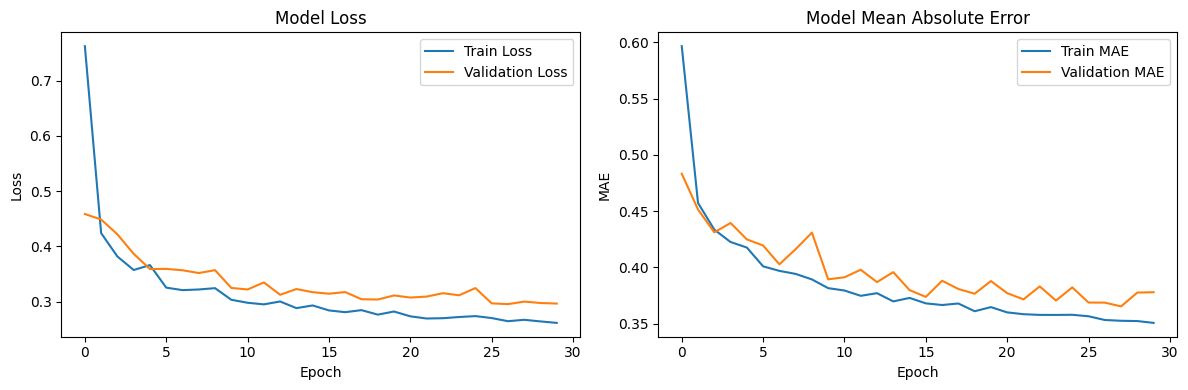

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

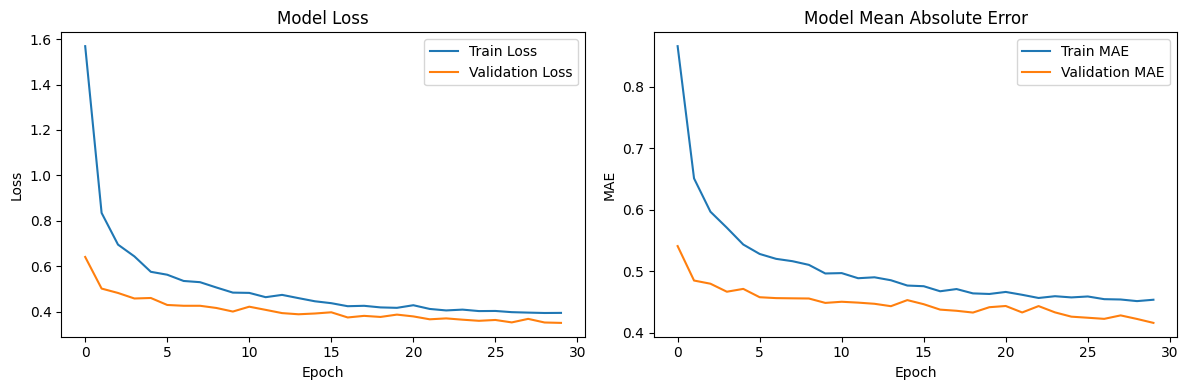

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Dropout is a regularization technique used in neural networks to prevent overfitting, which occurs when a model performs well on training data but poorly on unseen data. Introduced by Srivastava et al. in 2014, dropout aims to make the model more robust and less sensitive to the specific weights of neurons. It works by randomly "dropping out" or setting a fraction of input units to zero at each training step. This means that during each forward and backward pass, different sets of neurons are active, effectively creating an ensemble of many different neural network architectures.

The dropout rate, typically a value between 0 and 1, indicates the proportion of neurons to drop. For example, a dropout rate of 0.5 means that half of the neurons are randomly ignored during each training iteration. This randomness forces the network to learn redundant representations of the data, as no single neuron can rely solely on another particular neuron. Consequently, this reduces the risk of overfitting since the model cannot learn complex co-adaptations of training data, making it more generalizable to new data.

During the training phase, the dropout process can be viewed as sampling from a large number of different subnetworks. Each subnetwork is trained with a different subset of neurons, but all share the same weights. During the testing or inference phase, dropout is turned off, and all neurons are used. To maintain consistency, the weights of the neurons are scaled by the dropout rate to account for the fact that more neurons are active compared to the training phase.

Dropout can be applied to any layer of the network, but it is commonly used with fully connected (dense) layers and sometimes with convolutional layers. It is a simple yet powerful technique to improve the performance and robustness of neural networks, contributing to better generalization on unseen data.

Let x be the input to the dropout layer, and let p be the dropout probability (the probability of setting an input to zero). During training, each element xi of the input x is independently set to zero with probability p, and scaled by 1/(1-p) to maintain the expected value of the output.

Mathematically, the forward pass of the dropout layer can be represented as:

During training: yi = (xi * Bernoulli(1-p))/(1-p)

Where Bernoulli(1-p) represents a random variable following the Bernoulli distribution with parameter 1-p.

During inference: yi = xi

During the backward pass, the gradient is simply scaled by the same mask used during the forward pass. Therefore, the backward pass can be represented as:

∂L/∂xi = (∂L/∂yi) * maski

Where:
- L is the loss function.
- ∂L/∂yi is the gradient of the loss with respect to the output of the dropout layer.
- maski is the mask applied during the forward pass.

This ensures that only the non-zero activations contribute to the gradient flow during training.

During inference, the dropout layer is usually disabled, so yi = xi, and there is no scaling or masking applied.

These mathematical formulations capture the behavior of the dropout layer both during training and inference.


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

y = tf.keras.utils.to_categorical(y, 3)

In [13]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 128ms/step - loss: 1.2216 - accuracy: 0.3333 - val_loss: 1.0682 - val_accuracy: 0.4583
Epoch 2/50
3/3 [==============================] - 0s 22ms/step - loss: 1.1339 - accuracy: 0.3750 - val_loss: 1.0002 - val_accuracy: 0.7083
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 1.0594 - accuracy: 0.4167 - val_loss: 0.9401 - val_accuracy: 0.8333
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 0.9105 - accuracy: 0.5729 - val_loss: 0.8866 - val_accuracy: 0.8750
Epoch 5/50
3/3 [==============================] - 0s 21ms/step - loss: 0.9373 - accuracy: 0.5104 - val_loss: 0.8381 - val_accuracy: 0.8750
Epoch 6/50
3/3 [==============================] - 0s 24ms/step - loss: 0.8792 - accuracy: 0.5833 - val_loss: 0.7943 - val_accuracy: 0.9167
Epoch 7/50
3/3 [==============================] - 0s 34ms/step - loss: 0.8341 - accuracy: 0.6667 - val_loss: 0.7543 - val_accuracy: 0.9167
Epoch 8/50
3/3 [==========

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy:.4f}')

y_pred = model.predict(X_test)

1/1 - 0s - loss: 0.2199 - accuracy: 0.9667 - 33ms/epoch - 33ms/step
Test Accuracy: 0.9667
1/1 [==============================] - 0s 61ms/step


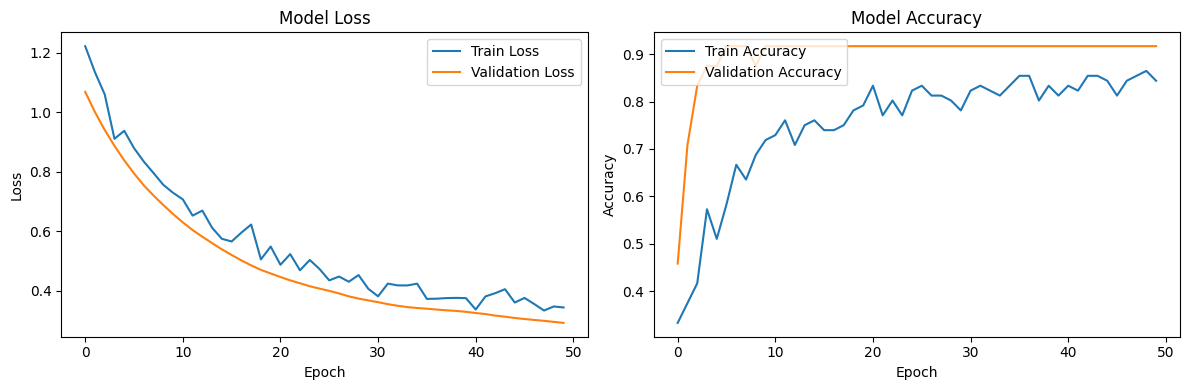

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

y = tf.keras.utils.to_categorical(y, 3)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 2s 141ms/step - loss: 2.4327 - accuracy: 0.2188 - val_loss: 1.0672 - val_accuracy: 0.4167
Epoch 2/50
3/3 [==============================] - 0s 24ms/step - loss: 2.1811 - accuracy: 0.2812 - val_loss: 1.0239 - val_accuracy: 0.4167
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 1.8834 - accuracy: 0.3021 - val_loss: 0.9833 - val_accuracy: 0.6667
Epoch 4/50
3/3 [==============================] - 0s 23ms/step - loss: 0.9994 - accuracy: 0.5833 - val_loss: 0.9451 - val_accuracy: 0.7083
Epoch 5/50
3/3 [==============================] - 0s 28ms/step - loss: 1.0594 - accuracy: 0.5938 - val_loss: 0.9117 - val_accuracy: 0.7917
Epoch 6/50
3/3 [==============================] - 0s 25ms/step - loss: 0.9518 - accuracy: 0.5938 - val_loss: 0.8804 - val_accuracy: 0.7917
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.8440 - accuracy: 0.6771 - val_loss: 0.8490 - val_accuracy: 0.8333
Epoch 8/50
3/3 [==========

In [45]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(X_test)

1/1 - 0s - loss: 0.2220 - accuracy: 0.9667 - 50ms/epoch - 50ms/step
Test Accuracy: 0.9667
1/1 [==============================] - 0s 145ms/step


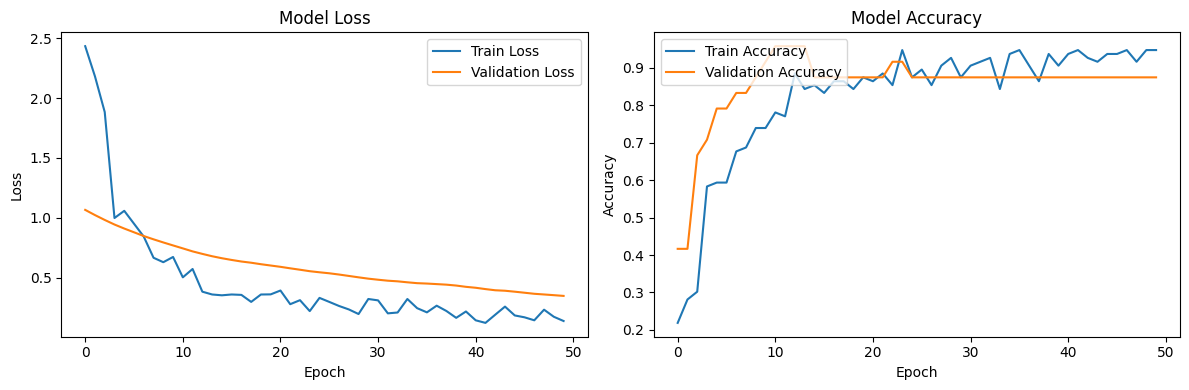

In [46]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Batch normalization is a transformative technique in the training of deep neural networks, addressing several key challenges and enhancing model performance. It was introduced to mitigate the problem of internal covariate shift, which occurs when the distribution of inputs to a layer changes during training. This phenomenon can slow down training and make it less stable.

The core idea of batch normalization is to standardize the inputs to each layer within a mini-batch so that they have a consistent mean and variance. This standardization process ensures that the inputs are more stable, allowing the network to train faster and more effectively. By normalizing the inputs, batch normalization allows for the use of higher learning rates, which can significantly speed up the training process.

Beyond just standardizing inputs, batch normalization includes learnable parameters that allow the network to scale and shift the normalized data. These parameters give the model the flexibility to learn the optimal representation for the data, preserving the network's ability to express complex functions.

Batch normalization offers several advantages:
1. **Accelerated Training**: With more stable inputs, gradients propagate more smoothly through the network, enabling faster convergence.
2. **Increased Stability**: It helps mitigate issues such as exploding and vanishing gradients, which are common in deep networks.
3. **Regularization Effect**: The noise introduced by using mini-batch statistics has a regularizing effect, potentially reducing the need for other forms of regularization like dropout.
4. **Better Generalization**: Networks trained with batch normalization tend to generalize better to new, unseen data, improving performance on test sets.

By incorporating batch normalization, deep neural networks become more robust and efficient, making this technique a staple in modern deep learning practices.

Batch normalization is a technique used in neural networks to normalize the inputs of each layer. It operates on a mini-batch of data during training and aims to stabilize and accelerate the training process.

Here's how batch normalization works:

1. For each feature in the mini-batch, calculate the mean and variance.
2. Normalize the features using the mean and variance.
3. Scale and shift the normalized features using learnable parameters (gamma and beta) to allow the model to learn the optimal scale and shift for each feature.
4. During training, these statistics (mean and variance) are calculated for each mini-batch and used to normalize the inputs.
5. During inference, a running average of the mean and variance calculated during training is used for normalization.

Mathematically, the batch normalization transformation can be represented as follows:

Given a mini-batch of activations x, the mean μ and variance σ^2 are calculated as:

μ_B = (1/m) * Σ(x_i)

σ^2_B = (1/m) * Σ(x_i - μ_B)^2

Where m is the number of samples in the mini-batch.

Then, the normalized activations x̂_i are obtained by:

x̂_i = (x_i - μ_B) / sqrt(σ^2_B + ε)

Where ε is a small constant added for numerical stability.

Finally, the output of the batch normalization layer is:

y_i = γ * x̂_i + β

Where γ and β are learnable parameters, and y_i is the output of the batch normalization layer.

This process helps to ensure that the activations of each layer in the network stay within a stable range during training, which can lead to faster convergence and better generalization.
